Original Data can be downloaded from following Kagglelink:
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

## 1. Librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Read Datas

In [2]:
suicide = pd.read_csv('master.csv')

## 3. Visiting Data & Data Cleaning

In [3]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
suicide = suicide.drop(['country-year', 'HDI for year'], axis=1)
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [6]:
suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [7]:
suicide['country'].value_counts()

Iceland                   382
Mauritius                 382
Austria                   382
Netherlands               382
Japan                     372
                         ... 
Bosnia and Herzegovina     24
Dominica                   12
Cabo Verde                 12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [8]:
suicide['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [9]:
# function to separate DataFrame for better overview to 3 countries

#def country_separation(country1, country2, country3):
    
suicide_reduced = suicide[suicide['country'].isin(['Brazil', 'Germany', 'United States'])]
    
#country1, country2, country3
    
#country_separation('Brazil', 'Germany', 'United States')

In [10]:
# function to separate DataFrame for better overview to 3 countries

def country_separation(country1, country2, country3):
    
   
    suicide_reduced = suicide[suicide['country'].isin([country1, country2, country3])]
    
    return country1, country2, country3
  
country_separation('Brazil', 'Germany', 'United States')
  

('Brazil', 'Germany', 'United States')

In [11]:
suicide_reduced.head()
sex = pd.get_dummies(suicide_reduced['sex'], drop_first=True)

In [12]:
suicide_reduced = pd.concat([suicide_reduced, sex], axis=1)
suicide_reduced.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,male
4172,Brazil,1985,male,75+ years,129,840300,15.35,"222,942,790,435",1898,G.I. Generation,1
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,"222,942,790,435",1898,G.I. Generation,1
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,"222,942,790,435",1898,Silent,1
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,"222,942,790,435",1898,Boomers,1
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,"222,942,790,435",1898,Generation X,1


In [13]:
suicide_reduced['country'].value_counts()

Brazil           372
United States    372
Germany          312
Name: country, dtype: int64

In [14]:
suicide_reduced['year'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

<AxesSubplot:>

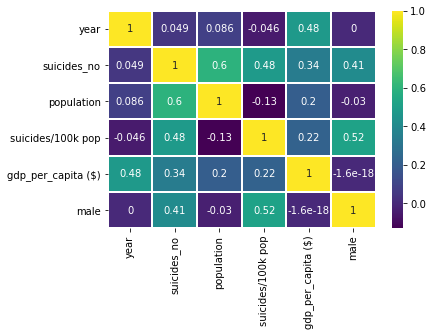

In [15]:
sns.heatmap(suicide_reduced.corr(), cmap='viridis', annot=True, linewidths=1)

In [16]:
#sns.jointplot(x="population", y="suicides_no",data=suicide_reduced,hue='country',kind="scatter", height=8) #scatter, hex, reg,kde

In [17]:
#sns.lineplot(data=suicide_reduced, y='suicides_no', x='year', hue='country')

In [18]:
#plt.figure(figsize=(15, 15))
#sns.barplot(data=suicide_reduced, x='year' ,y='suicides_no', hue='country')


## Data Frame to visualize Suicide Rates Worldwide

In [19]:
suicide_worldwide = suicide.groupby(['year'])[['suicides_no', 'population', 'suicides/100k pop']].sum()
suicide[' gdp_for_year ($) '] = suicide[' gdp_for_year ($) '].str.replace(',', '').astype(float)
suicide_worldwide['gdp_for_year ($)'] = suicide.groupby(['year'])[" gdp_for_year ($) "].mean()
suicide_worldwide['gdp_per_capita ($)'] = suicide.groupby(['year'])["gdp_per_capita ($)"].mean()
suicide_worldwide.round(1)
#{'suicides_no': 0, 'population' : 0, 'suicides/100k pop': 1, 'gdp_for_year ($)': 1, 'gdp_per_capita ($)': 1}
suicide_worldwide.reset_index(inplace=True)
suicide_worldwide.head()

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,1985,116063,1008600086,6811.89,1.926471e+11,6091.229167
1,1986,120670,1029909613,6579.84,2.302251e+11,7126.104167
2,1987,126842,1095029726,7545.45,2.403856e+11,8712.592593
3,1988,121026,1054094424,7473.13,2.985675e+11,9983.857143
4,1989,160244,1225514347,8036.54,3.070805e+11,9725.038462


<AxesSubplot:>

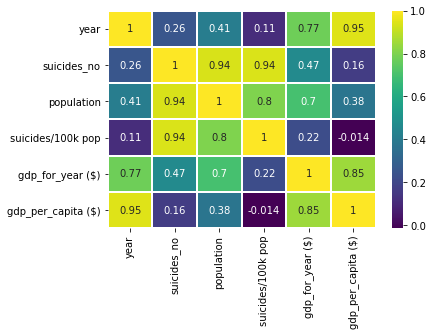

In [20]:
sns.heatmap(suicide_worldwide.corr(), cmap='viridis', annot=True, linewidths=1)

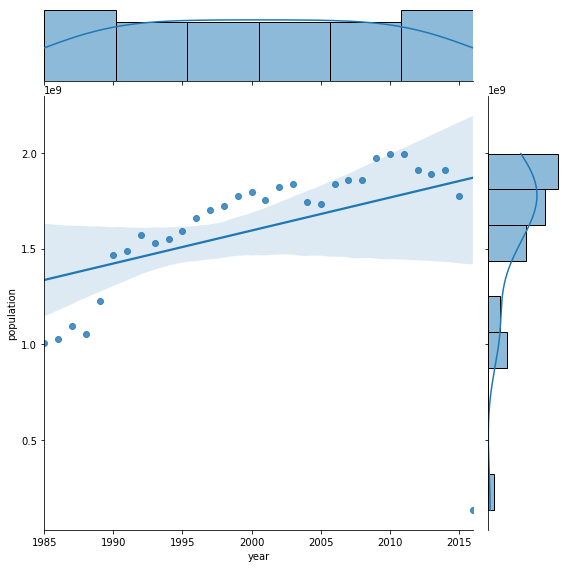

In [21]:
sns.jointplot(x="year", y="population",data=suicide_worldwide,kind="reg", height=8) #scatter, hex, reg,kde

Text(0.5, 1.0, 'GDP per capita over the years')

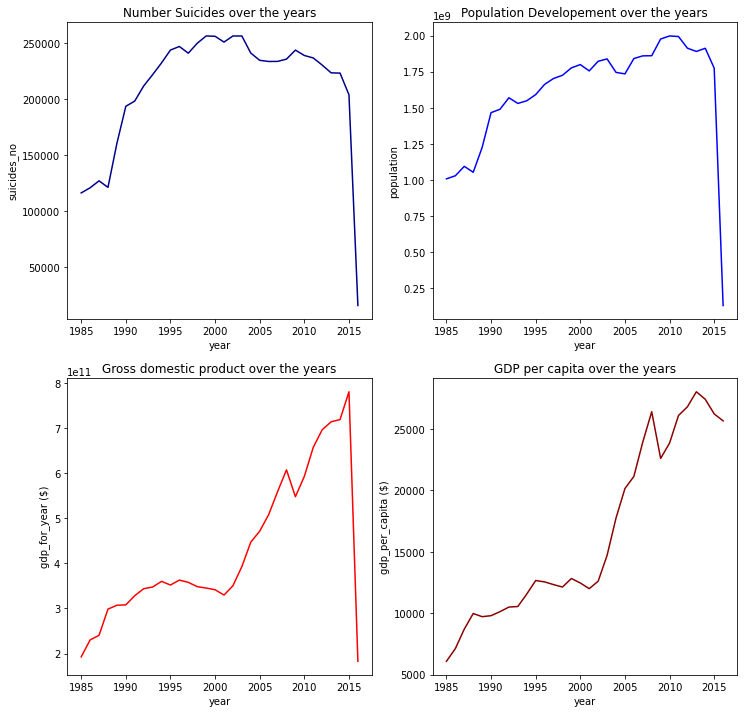

In [22]:
plt.subplots(2,2, figsize=(12,12))

plt.subplot(2,2, 1)
sns.lineplot(data=suicide_worldwide, y='suicides_no', x='year', color='darkblue')
plt.title("Number Suicides over the years")

plt.subplot(2,2, 2)
sns.lineplot(data=suicide_worldwide, y='population', x='year', color='blue')
plt.title("Population Developement over the years")

plt.subplot(2,2, 3)
sns.lineplot(data=suicide_worldwide, y='gdp_for_year ($)', x='year', color='red')
plt.title("Gross domestic product over the years")

plt.subplot(2,2, 4)
sns.lineplot(data=suicide_worldwide, y='gdp_per_capita ($)', x='year', color='darkred')
plt.title("GDP per capita over the years")

Text(0.5, 1.0, 'suicides/100k pop over the years')

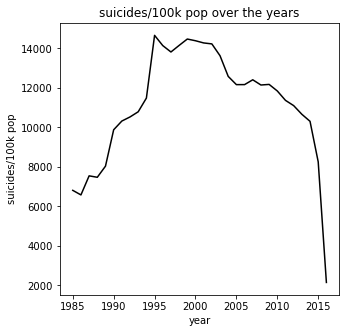

In [23]:
plt.figure(figsize=(5,5))
sns.lineplot(data=suicide_worldwide, y='suicides/100k pop', x='year', color='black')
plt.title("suicides/100k pop over the years")

## Data visualization by countries

In [24]:
suicide_groupby1 = suicide_reduced.groupby(['year', 'country', 'sex'])[[
    'suicides_no', 'population', 'suicides/100k pop']].agg('sum')

suicide_groupby2 = suicide_reduced.groupby(['year', 'country'])[[
    'suicides_no', 'population', 'suicides/100k pop']].agg('sum')

suicide_groupby3 = suicide_reduced.groupby(['year', 'country', 'generation'])[[
    'suicides_no', 'population', 'suicides/100k pop']].agg('sum')

In [25]:
suicide_groupby1
suicide_groupby1.reset_index(inplace=True)
suicide_groupby1

,year,country,sex,suicides_no,population,suicides/100k pop
0,1985,Brazil,female,1066,58996800,13.08
1,1985,Brazil,male,3162,58482100,46.10
2,1985,United States,female,6308,113781000,31.86
3,1985,United States,male,23138,106942000,152.86
4,1986,Brazil,female,1154,60498100,13.36
...,...,...,...,...,...,...
171,2015,Brazil,male,8766,93677041,63.39
172,2015,Germany,female,2685,39783984,35.23
173,2015,Germany,male,7403,38352699,115.11
174,2015,United States,female,10199,151958511,35.23


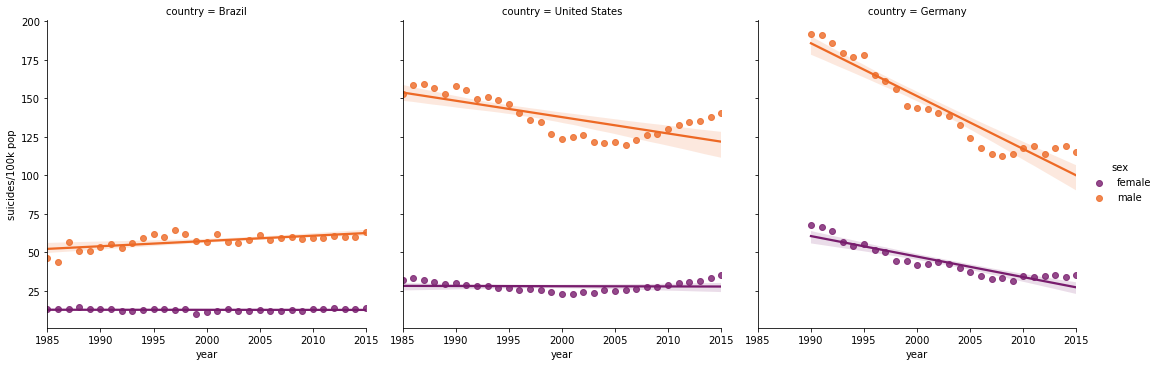

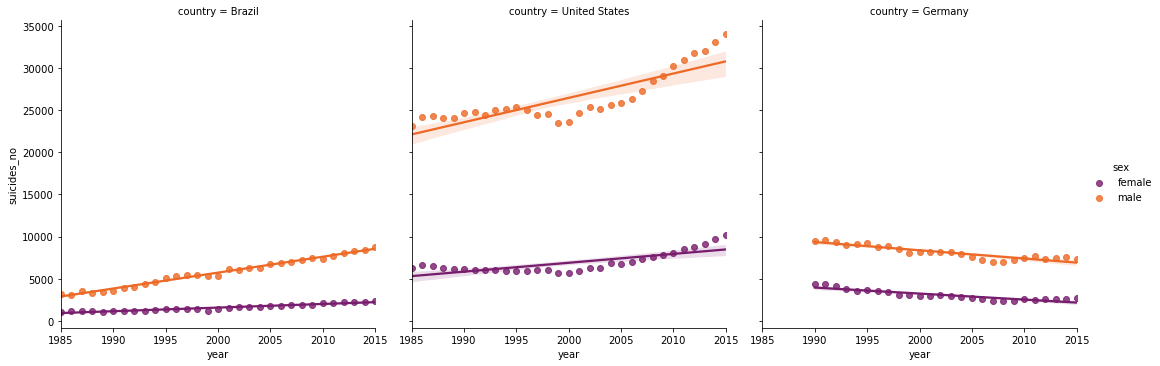

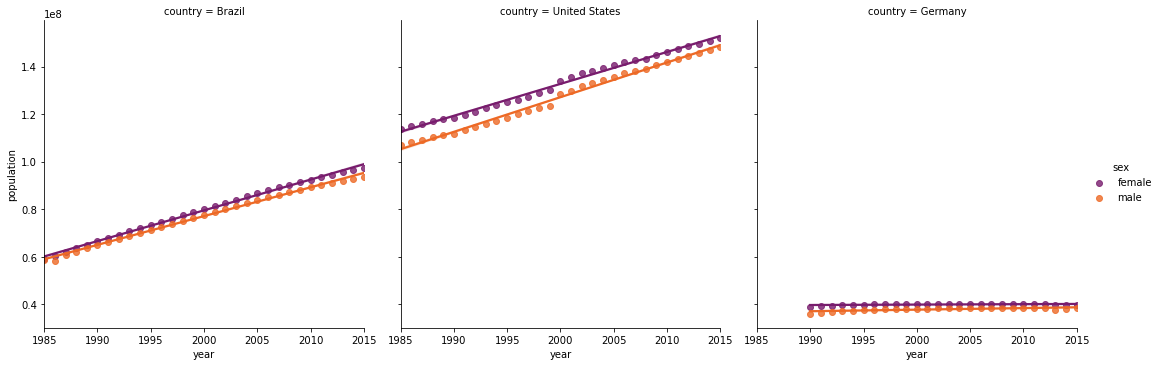

In [26]:
sns.lmplot(data=suicide_groupby1, y='suicides/100k pop', x='year', hue='sex', col='country',  palette='inferno')
sns.lmplot(data=suicide_groupby1, y='suicides_no', x='year', hue='sex', col='country',  palette='inferno')
sns.lmplot(data=suicide_groupby1, y='population', x='year', hue='sex', col='country',  palette='inferno')

In [27]:
suicide_groupby2
suicide_groupby2.reset_index(inplace=True)
suicide_groupby2

,year,country,suicides_no,population,suicides/100k pop
0,1985,Brazil,4228,117478900,59.18
1,1985,United States,29446,220723000,184.72
2,1986,Brazil,4271,118776400,57.16
3,1986,United States,30892,222953000,191.65
4,1987,Brazil,4672,122822467,70.12
...,...,...,...,...,...
83,2014,Germany,10217,77552369,153.04
84,2014,United States,42769,297749735,171.33
85,2015,Brazil,11163,191087085,77.45
86,2015,Germany,10088,78136683,150.34


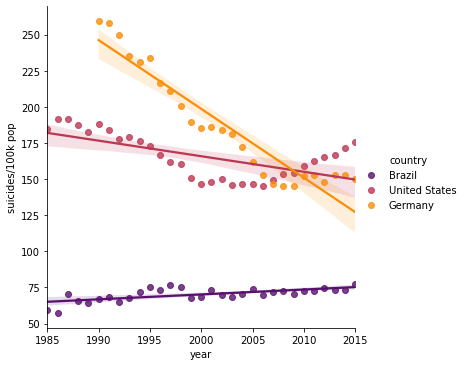

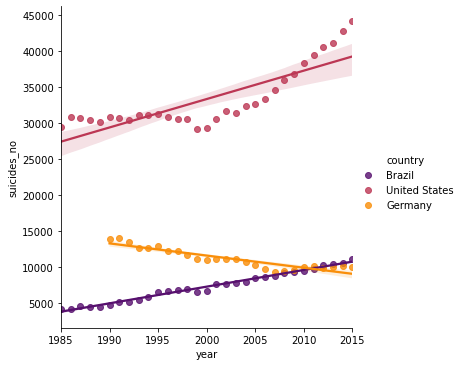

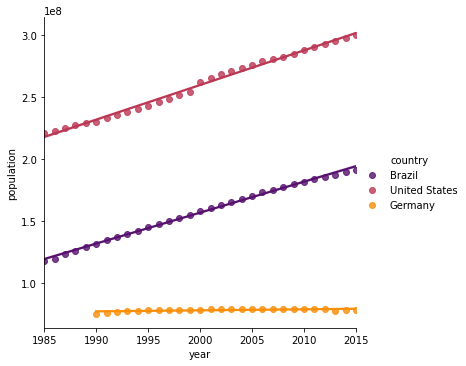

In [29]:
sns.lmplot(data=suicide_groupby2, y='suicides/100k pop', x='year', hue='country',  palette='inferno')
sns.lmplot(data=suicide_groupby2, y='suicides_no', x='year', hue='country',  palette='inferno')
sns.lmplot(data=suicide_groupby2, y='population', x='year', hue='country',  palette='inferno')

In [30]:
suicide_groupby3
suicide_groupby3.reset_index(inplace=True)
suicide_groupby3

,year,country,generation,suicides_no,population,suicides/100k pop
0,1985,Brazil,Boomers,1060,21561600,9.84
1,1985,Brazil,G.I. Generation,844,12843400,31.18
2,1985,Brazil,Generation X,1017,58902400,7.30
3,1985,Brazil,Silent,1307,24171500,10.86
4,1985,United States,Boomers,6376,42027000,30.36
...,...,...,...,...,...,...
401,2015,United States,Boomers,11940,67380307,36.29
402,2015,United States,Generation X,15687,83189819,37.69
403,2015,United States,Generation Z,413,41616888,1.98
404,2015,United States,Millenials,12438,87941695,56.06


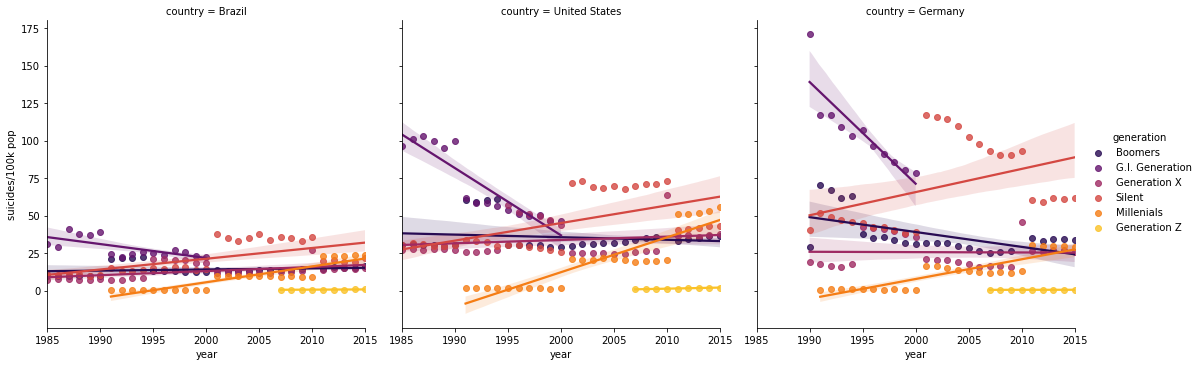

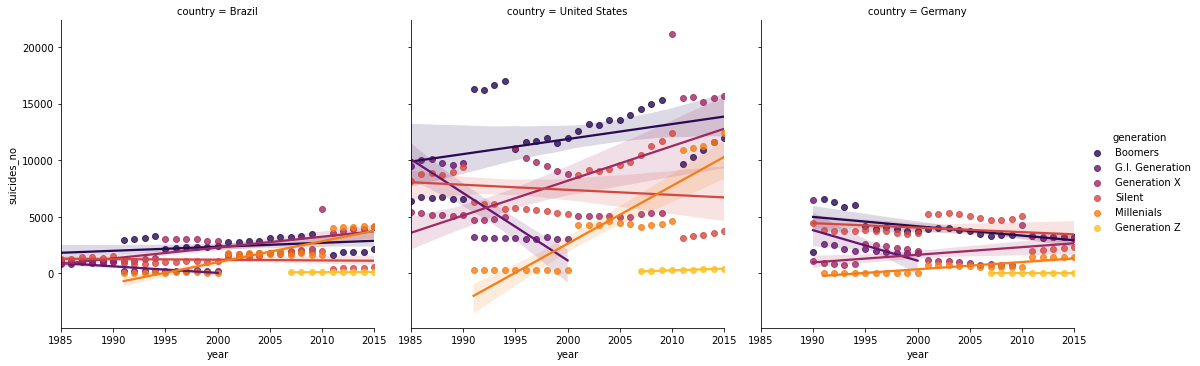

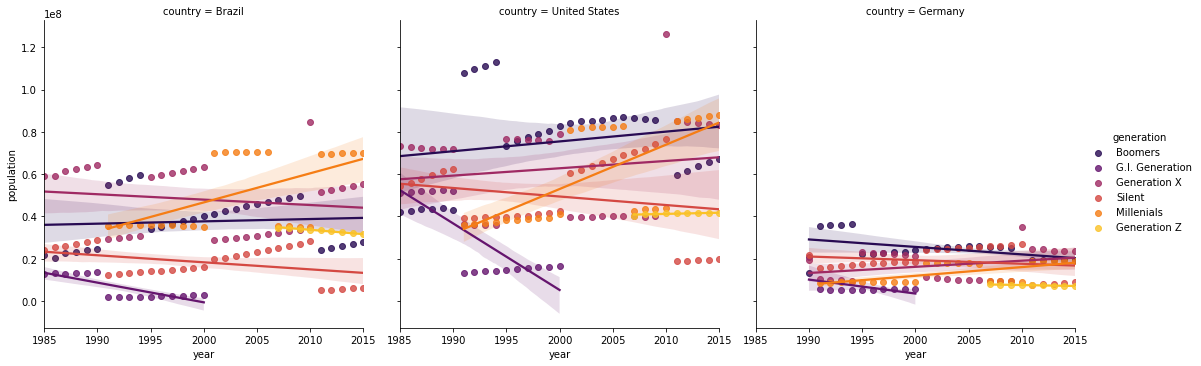

In [32]:
# The visualization here is to confusing and the generations are splitted later in separate diagrams

sns.lmplot(data=suicide_groupby3, y='suicides/100k pop', x='year', hue='generation', col='country',  palette='inferno')
sns.lmplot(data=suicide_groupby3, y='suicides_no', x='year', hue='generation', col='country',  palette='inferno')
sns.lmplot(data=suicide_groupby3, y='population', x='year', hue='generation', col='country',  palette='inferno')

<AxesSubplot:>

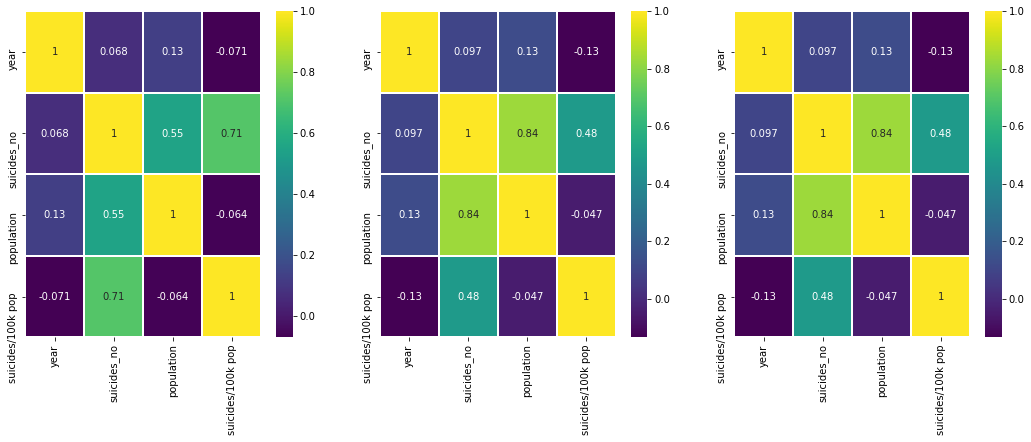

In [33]:
plt.subplots(1,3, figsize=(18,6))

plt.subplot(1,3,1)
sns.heatmap(suicide_groupby1.corr(), cmap='viridis', annot=True, linewidths=1)

plt.subplot(1,3,2)
sns.heatmap(suicide_groupby2.corr(), cmap='viridis', annot=True, linewidths=1)

plt.subplot(1,3,3)
sns.heatmap(suicide_groupby2.corr(), cmap='viridis', annot=True, linewidths=1)

<AxesSubplot:xlabel='year', ylabel='population'>

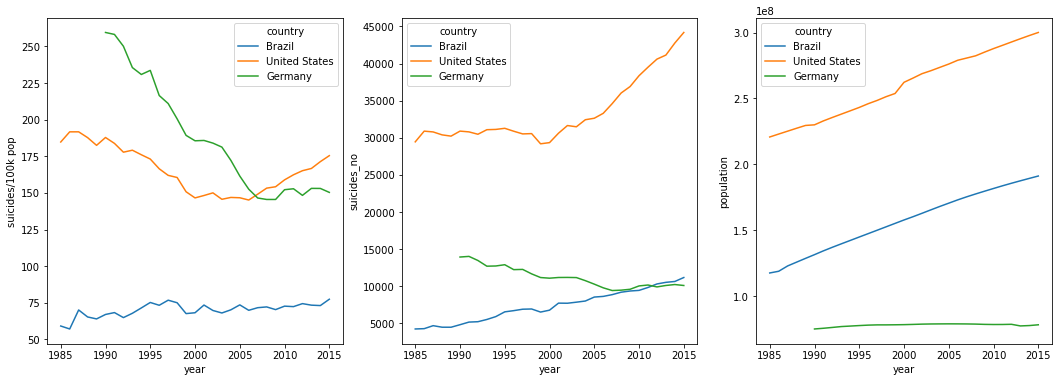

In [34]:
plt.subplots(1,3, figsize=(18,6))

plt.subplot(1,3,1)
sns.lineplot(data=suicide_groupby2, y='suicides/100k pop', x='year', hue='country')

plt.subplot(1,3,2)
sns.lineplot(data=suicide_groupby2, y='suicides_no', x='year', hue='country')

plt.subplot(1,3,3)
sns.lineplot(data=suicide_groupby2, y='population', x='year', hue='country')

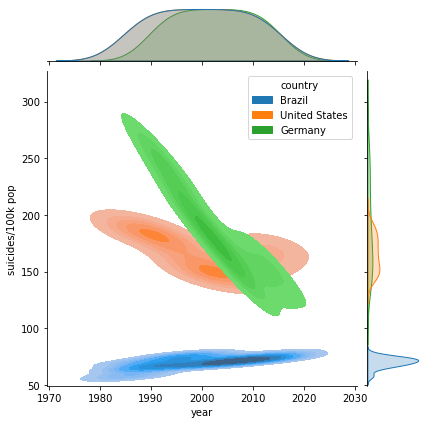

In [35]:
sns.jointplot(x="year", y="suicides/100k pop", data=suicide_groupby2, kind="kde", hue='country', fill=True) #scatter, hex, reg,kde

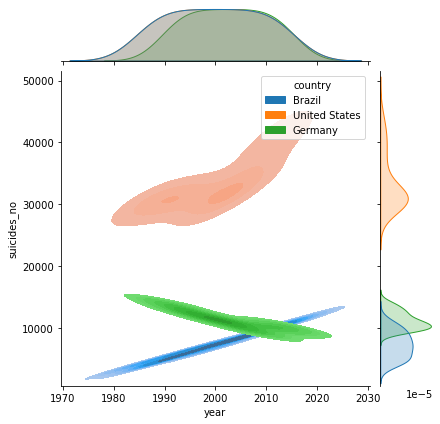

In [36]:
sns.jointplot(x="year", y="suicides_no", data=suicide_groupby2, kind="kde", hue='country', fill=True) #scatter, hex, reg,kde

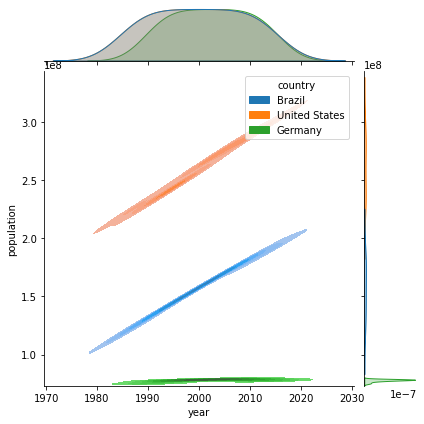

In [37]:
sns.jointplot(x="year", y="population", data=suicide_groupby2, kind="kde", hue='country', fill=True) #scatter, hex, reg,kde

<AxesSubplot:xlabel='year', ylabel='population'>

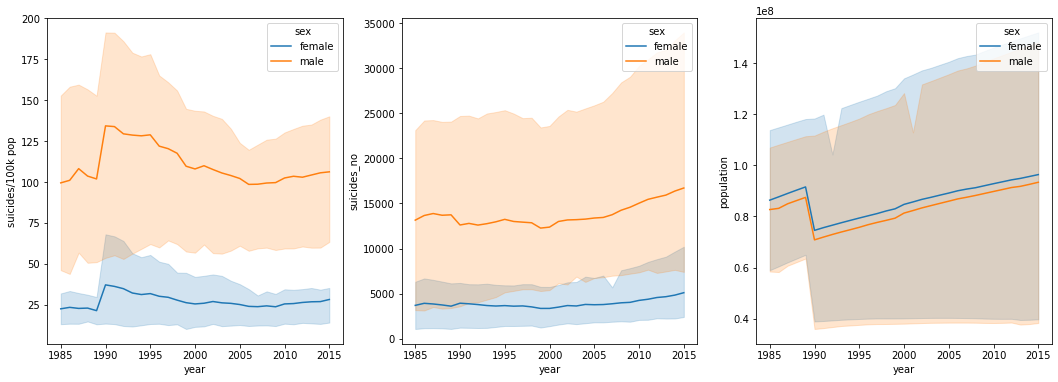

In [38]:
plt.subplots(1,3, figsize=(18,6))

plt.subplot(1,3,1)
sns.lineplot(data=suicide_groupby1, y='suicides/100k pop', x='year', hue='sex')

plt.subplot(1,3,2)
sns.lineplot(data=suicide_groupby1, y='suicides_no', x='year', hue='sex')

plt.subplot(1,3,3)
sns.lineplot(data=suicide_groupby1, y='population', x='year', hue='sex')

In [39]:
suicide['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

Generation X


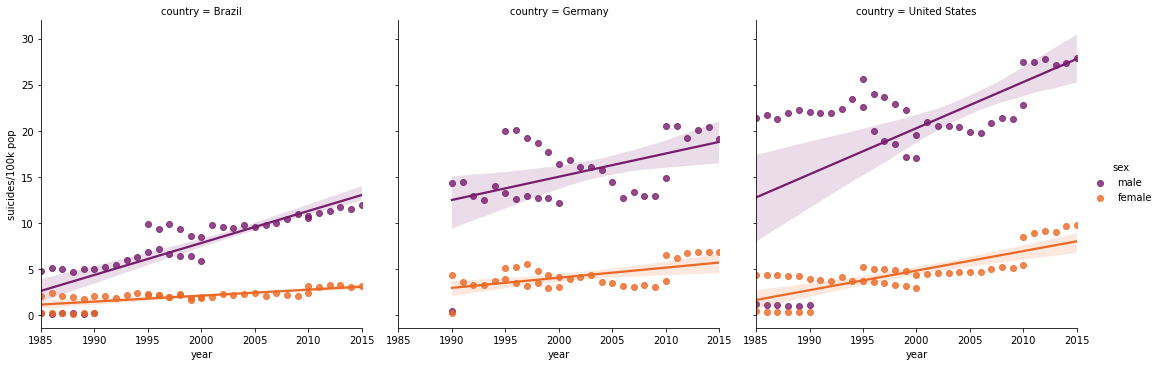

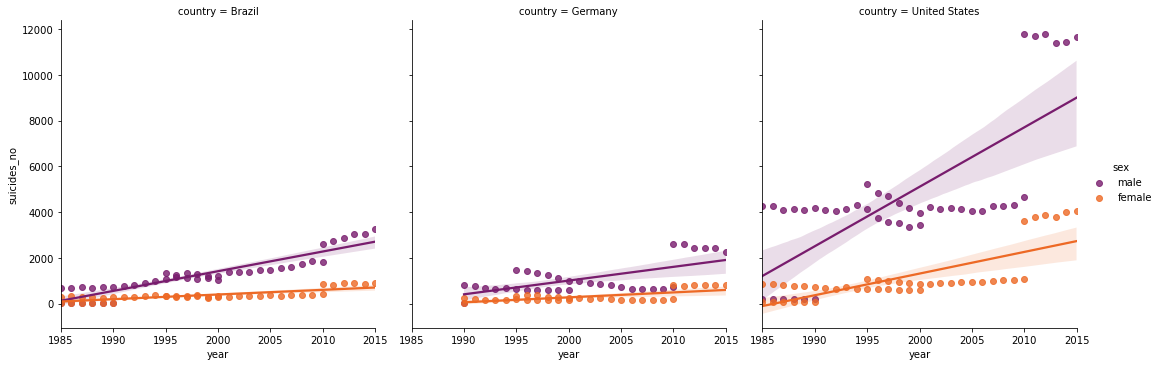

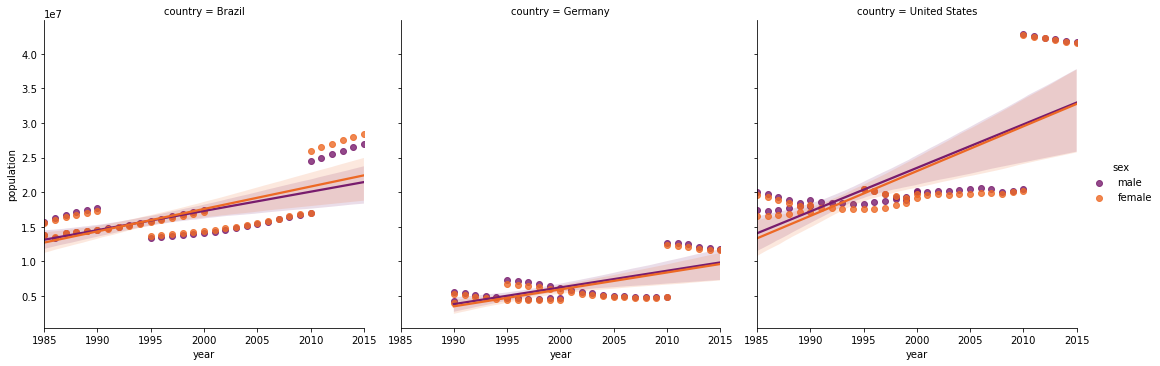

In [40]:
print('Generation X')
sns.lmplot(data=suicide_reduced[suicide_reduced['generation']=='Generation X'], y='suicides/100k pop', x='year', hue='sex', col='country',  palette='inferno')
sns.lmplot(data=suicide_reduced[suicide_reduced['generation']=='Generation X'], y='suicides_no', x='year', hue='sex', col='country',  palette='inferno')
sns.lmplot(data=suicide_reduced[suicide_reduced['generation']=='Generation X'], y='population', x='year', hue='sex', col='country',  palette='inferno')


Silent


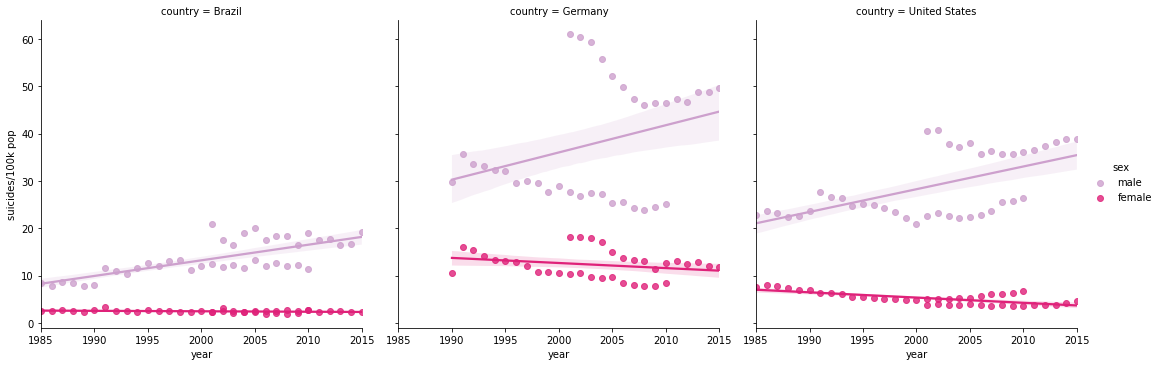

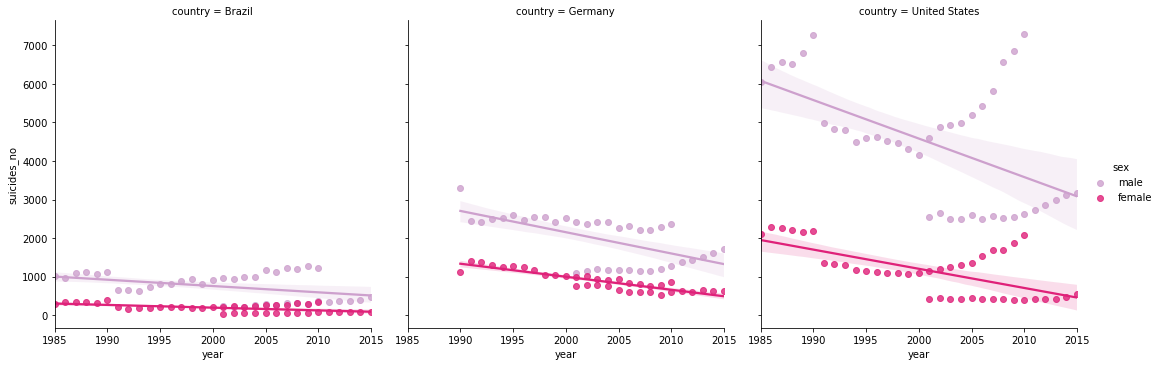

In [41]:
print('Silent')
sns.lmplot(data=suicide_reduced[suicide_reduced['generation']=='Silent'], y='suicides/100k pop', x='year', hue='sex', col='country',  palette='PuRd')
sns.lmplot(data=suicide_reduced[suicide_reduced['generation']=='Silent'], y='suicides_no', x='year', hue='sex', col='country',  palette='PuRd')

G.I. Generation


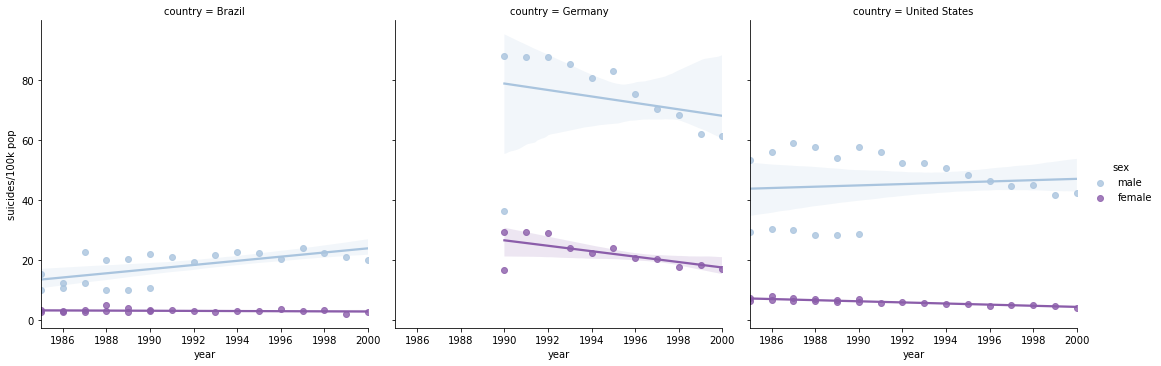

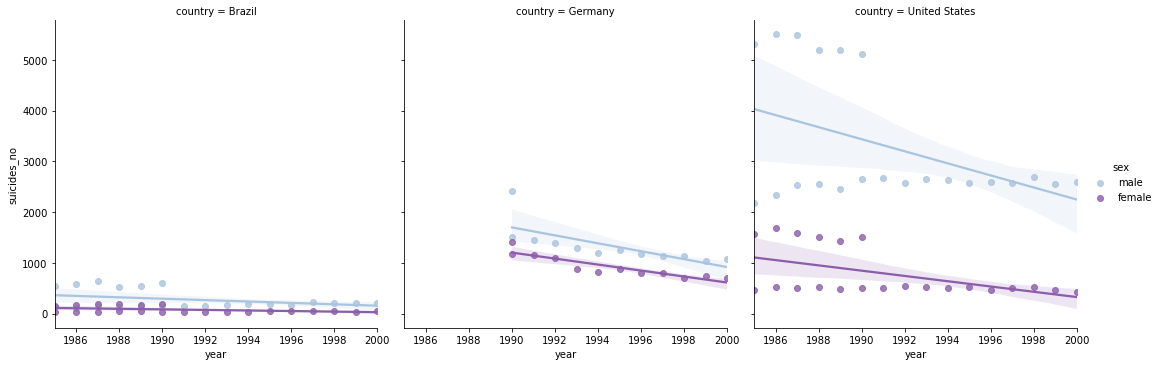

In [42]:
print('G.I. Generation')
sns.lmplot(data=suicide_reduced[suicide_reduced['generation']=='G.I. Generation'], y='suicides/100k pop', x='year', hue='sex', col='country',  palette='BuPu')
sns.lmplot(data=suicide_reduced[suicide_reduced['generation']=='G.I. Generation'], y='suicides_no', x='year', hue='sex', col='country',  palette='BuPu')

Boomers


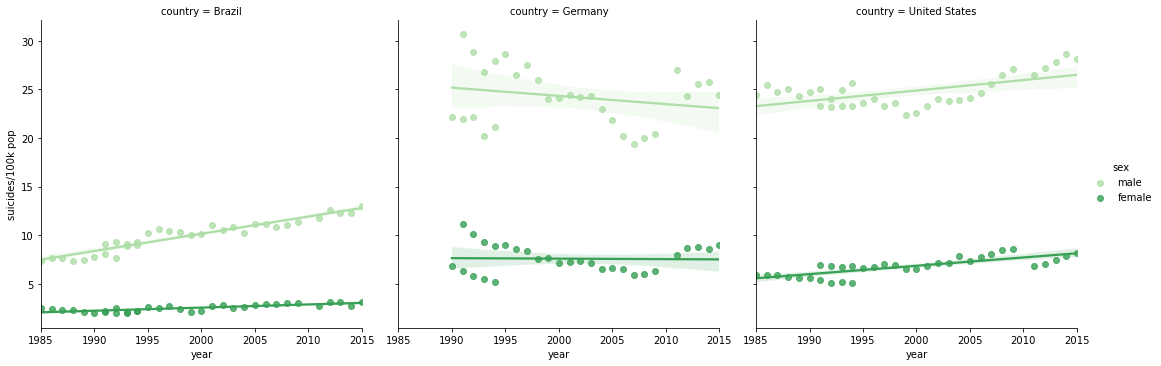

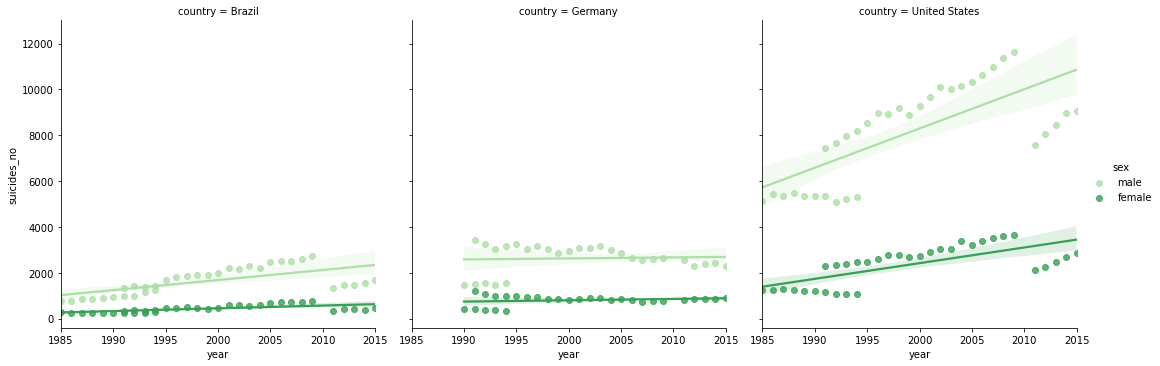

In [43]:
print('Boomers')
sns.lmplot(data=suicide_reduced[suicide_reduced['generation']=='Boomers'], y='suicides/100k pop', x='year', hue='sex', col='country',  palette='Greens')
sns.lmplot(data=suicide_reduced[suicide_reduced['generation']=='Boomers'], y='suicides_no', x='year', hue='sex', col='country',  palette='Greens')

Millenials


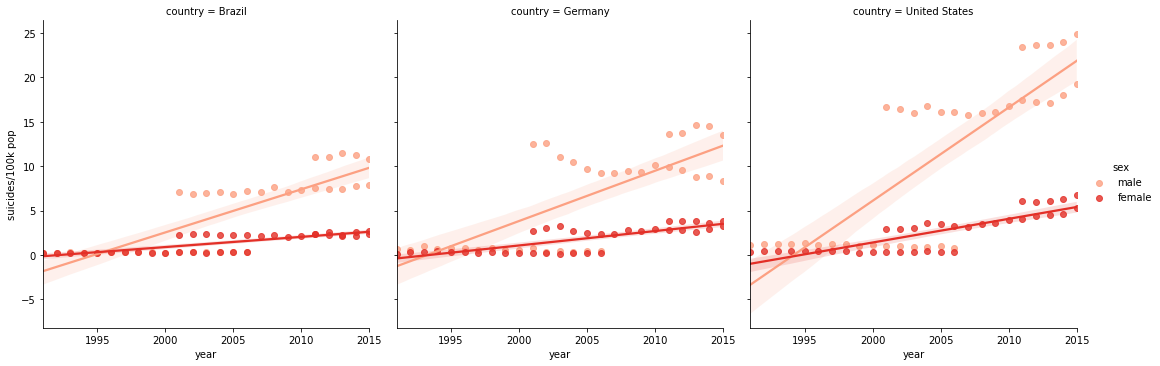

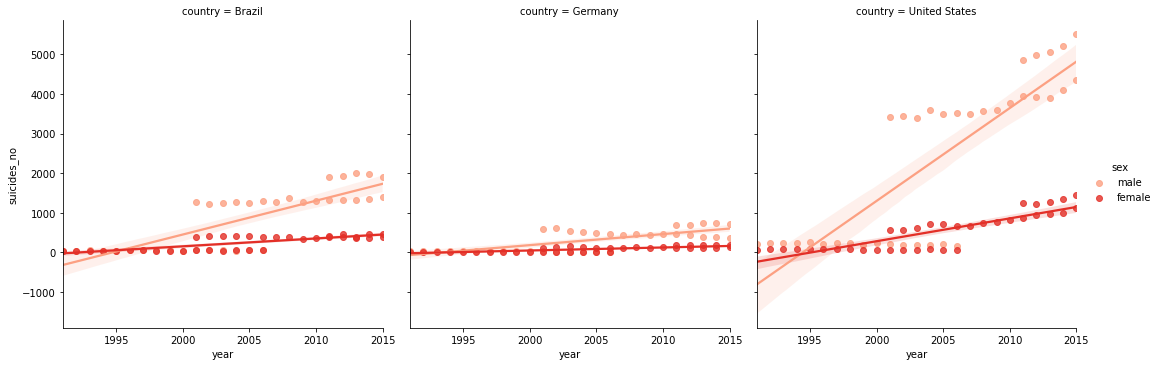

In [44]:
print('Millenials')
sns.lmplot(data=suicide_reduced[suicide_reduced['generation']=='Millenials'], y='suicides/100k pop', x='year', hue='sex', col='country',  palette='Reds')
sns.lmplot(data=suicide_reduced[suicide_reduced['generation']=='Millenials'], y='suicides_no', x='year', hue='sex', col='country',  palette='Reds')

Generation Z


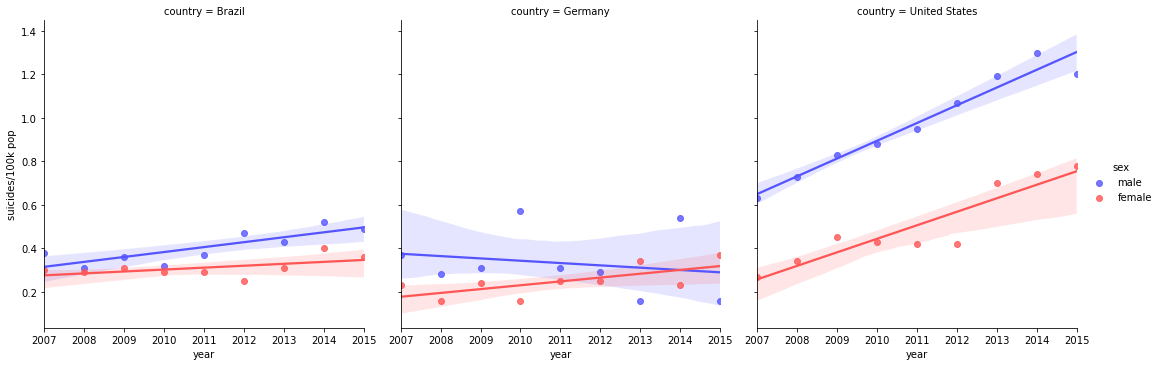

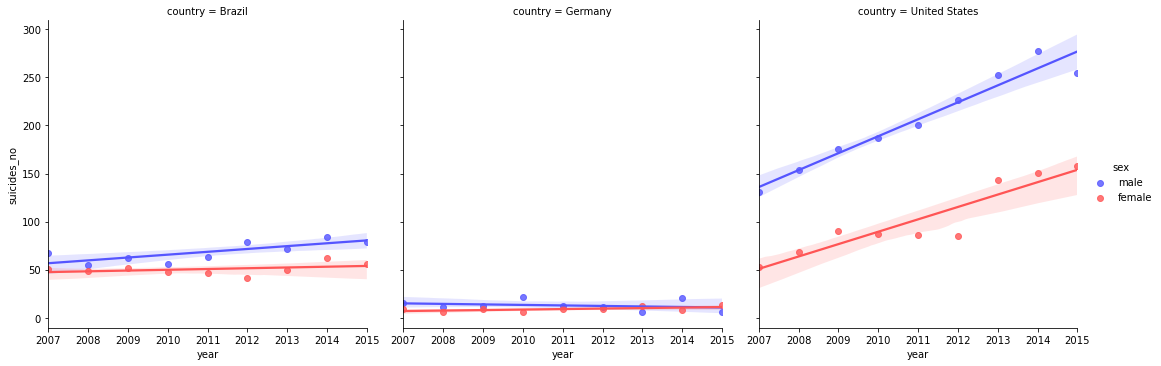

In [45]:
print('Generation Z')
sns.lmplot(data=suicide_reduced[suicide_reduced['generation']=='Generation Z'], y='suicides/100k pop', x='year', hue='sex', col='country',  palette='seismic')
sns.lmplot(data=suicide_reduced[suicide_reduced['generation']=='Generation Z'], y='suicides_no', x='year', hue='sex', col='country',  palette='seismic')